## Distinguishing Sentiments


In [1]:
# Import libraries

import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
from dateutil import tz
import time

In [2]:
# Twitter API Keys
consumer_key = "EG3Bb5z38qMmMeE5utlpf72LX"
consumer_secret = "J1CPSjTpYbnRe9GG5HIp7sPfnBADqxHWmDwHzhD56R2WpRmybF"
access_token = "1884478188-AG0aq4UoFhOChBo53sGll4CYrLiCxwG5gbbctlM"
access_token_secret = "raUCv9XvRi44cGveC3uPvkDrShO9HvG4w3cZKhZkZFJqh"

In [23]:
# Get 100 public tweets from BBC CBS CNN Fox and New York Times and perform sentiment analysis

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts
thList=['@BBC', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
target_user='@BBC'
dfTweets = pd.DataFrame(columns=['strAccount','strText','DateTime','fltCompound','fltPositive','fltNeutral','fltNegative','hrsApart'])
row=0

for thCurrent in thList:

    # Counter
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(thCurrent, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            analyzer = SentimentIntensityAnalyzer()
            json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': '))
            strTweet = tweet["text"]
            target_string = strTweet
            strDate=tweet['created_at']
            ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))

            # Run analysis
            compound = analyzer.polarity_scores(target_string)["compound"]
            pos = analyzer.polarity_scores(target_string)["pos"]
            neu = analyzer.polarity_scores(target_string)["neu"]
            neg = analyzer.polarity_scores(target_string)["neg"]
            
            # Load results into dataframe
            dfTweets.loc[row]=[thCurrent, strTweet, ts, compound, pos, neu, neg, 0]
            
            counter = counter + 1
            row = row + 1
            
dfTweets

,strAccount,strText,DateTime,fltCompound,fltPositive,fltNeutral,fltNegative,hrsApart
0,@BBC,"If you put all the man hours together, it woul...",2017-12-14 19:00:04,0.0000,0.000,1.000,0.000,0
1,@BBC,Scientists have unveiled a detailed genetic ma...,2017-12-14 18:30:10,0.0000,0.000,1.000,0.000,0
2,@BBC,🍠🥕🥑 Here are our favourite vegetarian dishes t...,2017-12-14 18:00:33,0.4019,0.137,0.863,0.000,0
3,@BBC,👽 'Ask them if they believe in aliens' + 6 oth...,2017-12-14 17:30:10,0.5859,0.245,0.682,0.073,0
4,@BBC,🙄\nLooking up or rolling eyes?\n\nVia @BBCScot...,2017-12-14 17:00:05,0.0000,0.000,1.000,0.000,0
5,@BBC,🎞🎵🎨 Gospel singer and civil rights activist @M...,2017-12-14 14:00:08,0.0000,0.000,1.000,0.000,0
6,@BBC,"🎄 @LiamPayne, @ddlovato &amp; @Camila_Cabello ...",2017-12-14 13:30:06,0.0000,0.000,1.000,0.000,0
7,@BBC,❄️⛄️ How cold can it get at work before you ca...,2017-12-14 13:03:04,0.1027,0.065,0.935,0.000,0
8,@BBC,RT @BBCNewsround: What do the @UKRobotWars hou...,2017-12-14 12:46:06,0.0000,0.000,1.000,0.000,0
9,@BBC,RT @BBC6Music: What was your favourite album o...,2017-12-14 12:45:09,0.4215,0.141,0.859,0.000,0


In [25]:
dfTweets.to_csv('tweets.csv')

In [26]:
# Calculate the time in between each tweet
time_in_between = []
dfTweets['DateTime'] = pd.to_datetime(dfTweets['DateTime'])
dfTweetsOrdered=dfTweets.copy()
dfTweetsOrdered=dfTweetsOrdered.sort_values(['strAccount','DateTime'], ascending=[True, True])

for outlet in range (0,5):
    
    baserow=outlet*100
    maxrow=baserow+100
    
    for row in range(baserow,maxrow):
       
        TweetsAgo=row-baserow+1 
        
        if (row != maxrow-1):
            curDateTime=dfTweetsOrdered['DateTime'][row]
            nextDateTime=dfTweetsOrdered['DateTime'][row+1]
            timeDelta=(curDateTime - nextDateTime)
            secondsApart=timeDelta.seconds
            hrsApart=secondsApart/3600
            time_in_between.append(hrsApart)
            dfTweetsOrdered.loc[row,'hrsApart']=hrsApart
            dfTweetsOrdered.loc[row,'TweetsAgo']=TweetsAgo
        else:
            dfTweetsOrdered.loc[row,'TweetsAgo']=TweetsAgo
        
dfTweetsOrdered

,strAccount,strText,DateTime,fltCompound,fltPositive,fltNeutral,fltNegative,hrsApart,TweetsAgo
99,@BBC,"🐠 In the final episode of #BluePlanet2, David ...",2017-12-12 13:00:05,0.0000,0.000,1.000,0.000,0,100.0
98,@BBC,🍪 @Nigella_Lawson's 'forgotten cookies' recipe...,2017-12-12 13:30:04,-0.2263,0.000,0.881,0.119,0.499722,99.0
97,@BBC,New research suggests that #ManFlu is a real t...,2017-12-12 14:00:05,0.0000,0.000,1.000,0.000,0.500278,98.0
96,@BBC,🥇 @BBCOne has announced a new Saturday night g...,2017-12-12 14:30:09,0.4767,0.147,0.853,0.000,0.501111,97.0
95,@BBC,🐋🐙 #BluePlanet2 has become @BBCiPlayer’s most ...,2017-12-12 15:00:10,0.4754,0.140,0.860,0.000,0.500278,96.0
94,@BBC,RT @BBCOne: #TheApprentice. Emoji style.\n😁😰🙄☺...,2017-12-12 15:04:37,0.0000,0.000,1.000,0.000,0.0741667,95.0
93,@BBC,RT @BBCiPlayer: 🎿 Planning a ski holiday? @Cla...,2017-12-12 15:05:52,0.6597,0.351,0.649,0.000,0.0208333,94.0
92,@BBC,The eight party season commandments that'll he...,2017-12-12 15:34:04,0.8176,0.415,0.585,0.000,0.47,93.0
91,@BBC,"RT @bbc5live: ""Tom gave the ultimate gift"" \n\...",2017-12-12 16:07:17,-0.1779,0.123,0.723,0.153,0.553611,92.0
90,@BBC,😍📸 Your pictures of beautiful Scotland from la...,2017-12-12 16:30:01,0.5994,0.262,0.738,0.000,0.378889,91.0


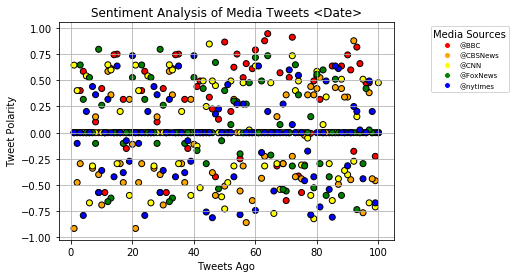

In [35]:
# Plot Time Between Tweets
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import requests

for index, row in dfTweetsOrdered.iterrows():
    if row['strAccount'] == '@BBC':
        dfTweetsOrdered.at[index,'Color'] = 'red'
    elif row['strAccount'] == '@CBSNews':
        dfTweetsOrdered.at[index,'Color'] = 'orange'
    elif row['strAccount'] == '@CNN':
        dfTweetsOrdered.at[index,'Color'] = 'yellow'
    elif row['strAccount'] == '@FoxNews':
        dfTweetsOrdered.at[index,'Color'] = 'green'
    elif row['strAccount'] == '@nytimes':
        dfTweetsOrdered.at[index,'Color'] = 'blue'
        
plt.scatter(dfTweetsOrdered['TweetsAgo'], 
            dfTweetsOrdered['fltCompound'], 
            label=dfTweetsOrdered['strAccount'], 
            color=dfTweetsOrdered['Color'],
            edgecolor='black')

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Sentiment Analysis of Media Tweets <Date>")
plt.grid(True)

BBCPatch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red", label='@BBC')
CBSPatch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="orange", label='@CBSNews')
CNNPatch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow", label='@CNN')
FoxPatch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="green", label='@FoxNews')
NYTPatch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue", label='@nytimes')
plt.legend(handles=[BBCPatch,CBSPatch,CNNPatch,FoxPatch,NYTPatch], fontsize=7, title='Media Sources', bbox_to_anchor=(1.1,1))
plt.savefig('sentiment.png', bbox_inches='tight')
plt.show()

In [16]:
dfTweetsOrdered.to_csv('tweets_ordered.csv')